In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from models.EchoStateNetwork import EchoStateNetwork

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [21]:
loaded_dataset = np.load("/Users/mughalfrazk/Study/SHU/Dissertation/code/mediapipe-eye-detection/out/ff_dataset_80.npz")

X_dataset = loaded_dataset["X_dataset"]
Y_dataset = loaded_dataset["Y_dataset"]

print(X_dataset.shape)
print(Y_dataset.shape)

(78, 1228, 3)
(78, 1228)


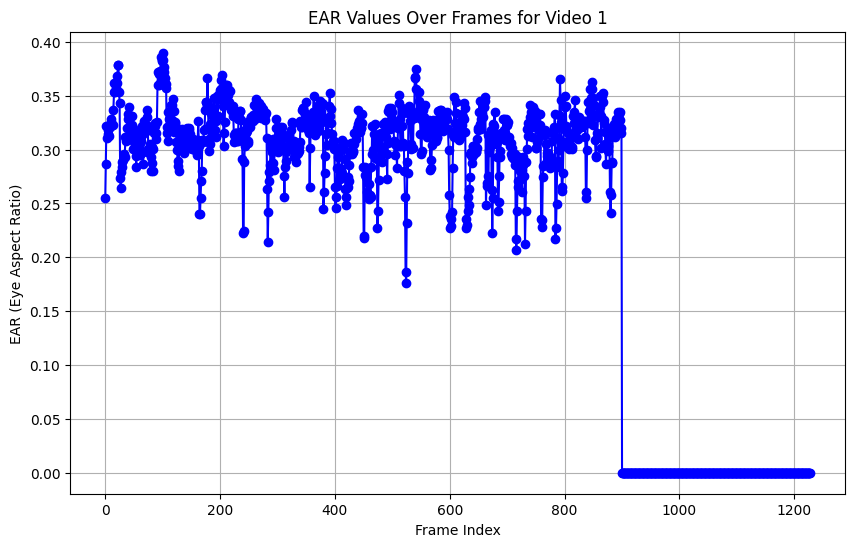

In [22]:
# Select a video to visualize (e.g., the first video in the dataset)
video_index = 0
ear_values = X_dataset[video_index, :, 0]  # Assuming EAR is the first feature

plt.figure(figsize=(10, 6))
plt.plot(range(len(ear_values)), ear_values, marker='o', linestyle='-', color='b')
plt.title(f'EAR Values Over Frames for Video {video_index + 1}')
plt.xlabel('Frame Index')
plt.ylabel('EAR (Eye Aspect Ratio)')
plt.grid()
plt.show()

/var/folders/7t/tn7d7_7x0294gvz7svhdqz480000gn/T/ipykernel_94219/61217211.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


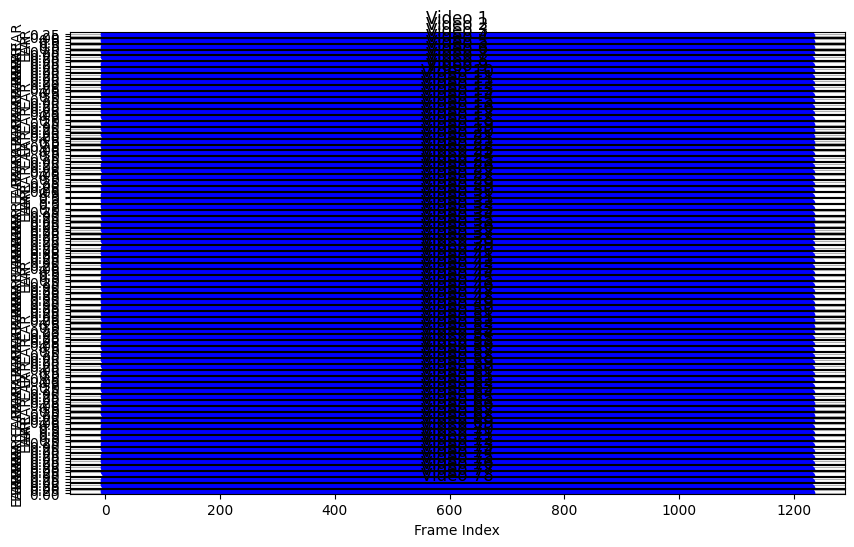

In [23]:
num_videos = X_dataset.shape[0]
fig, axes = plt.subplots(num_videos, 1, figsize=(10, 6), sharex=True)

for i in range(num_videos):
    ear_values = X_dataset[i, :, 0]  # EAR values for video i
    axes[i].plot(ear_values, marker='o', linestyle='-', color='b')
    axes[i].set_title(f'Video {i + 1}')
    axes[i].set_ylabel('EAR')
    axes[i].grid()

axes[-1].set_xlabel('Frame Index')
plt.tight_layout()
plt.show()

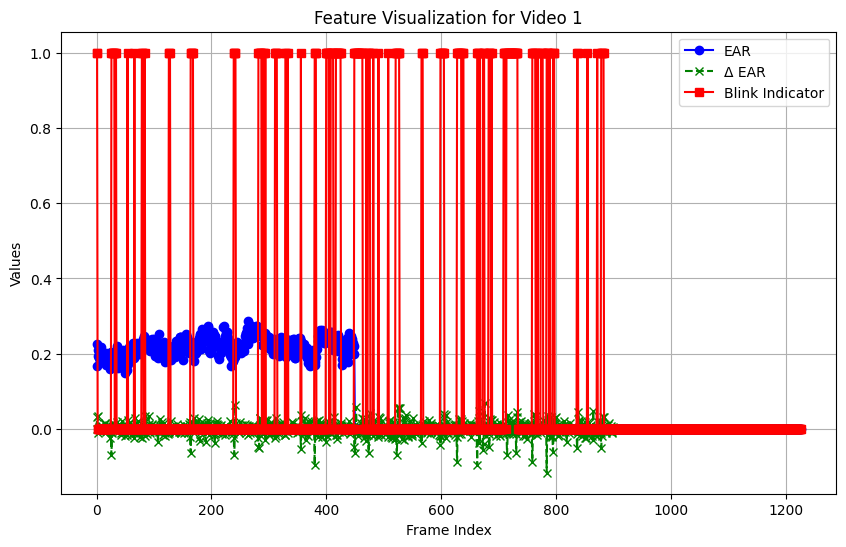

In [24]:
# Extract features for the selected video
delta_ear = X_dataset[video_index, :, 1]  # Assuming Δ EAR is the second feature
blink_indicator = X_dataset[video_index, :, 2]  # Assuming Blink Indicator is the third feature

# Plot all features
plt.figure(figsize=(10, 6))

plt.plot(ear_values, label='EAR', color='b', marker='o')
plt.plot(delta_ear, label='Δ EAR', color='g', linestyle='--', marker='x')
plt.plot(blink_indicator, label='Blink Indicator', color='r', linestyle='-', marker='s')

plt.title(f'Feature Visualization for Video {video_index + 1}')
plt.xlabel('Frame Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

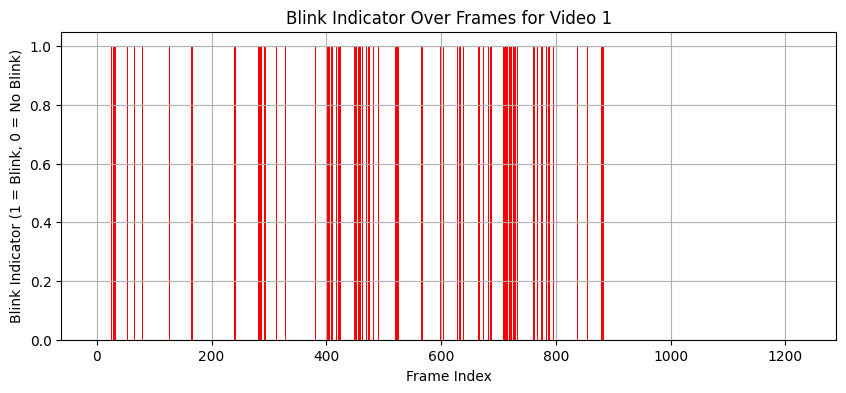

In [25]:
# Bar chart for Blink Indicator
plt.figure(figsize=(10, 4))
plt.bar(range(len(blink_indicator)), blink_indicator, color='red')
plt.title(f'Blink Indicator Over Frames for Video {video_index + 1}')
plt.xlabel('Frame Index')
plt.ylabel('Blink Indicator (1 = Blink, 0 = No Blink)')
plt.grid()
plt.show()

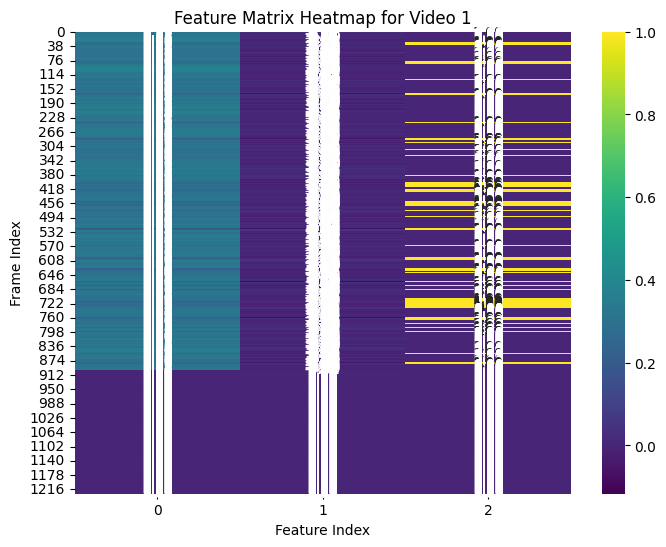

In [26]:
# Select the feature matrix for a specific video
feature_matrix = X_dataset[video_index]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(feature_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title(f'Feature Matrix Heatmap for Video {video_index + 1}')
plt.xlabel('Feature Index')
plt.ylabel('Frame Index')
plt.show()

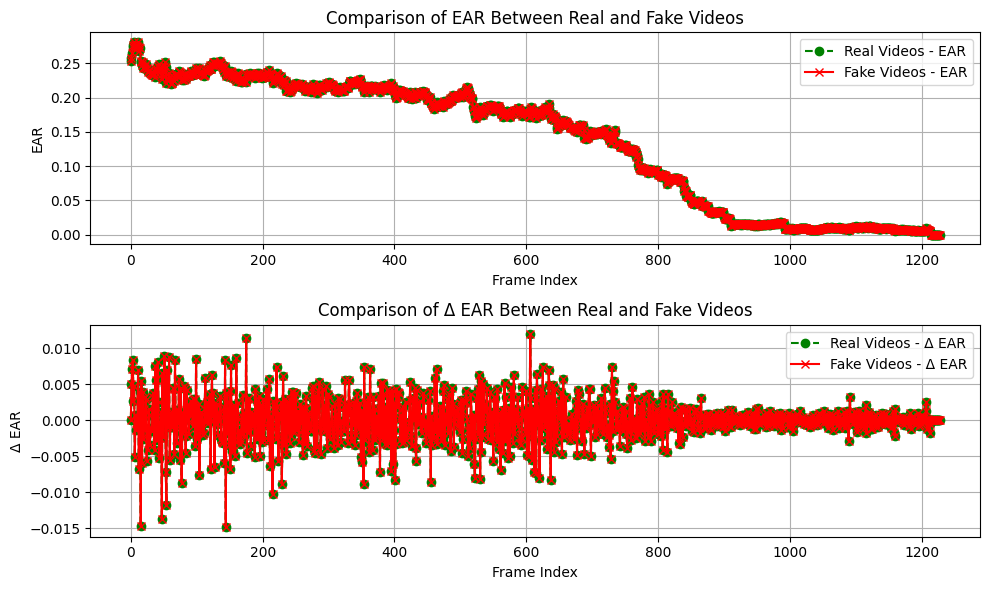

In [27]:
# Separate videos into real (target=0) and fake (target=1)
real_videos = X_dataset[Y_dataset[:, 0] == 0]  # Videos with target 0
fake_videos = X_dataset[Y_dataset[:, 0] == 1]  # Videos with target 1

# Calculate the mean EAR and Δ EAR for real and fake videos
mean_ear_real = np.mean(real_videos[:, :, 0], axis=0)  # Assuming EAR is feature 0
mean_delta_ear_real = np.mean(real_videos[:, :, 1], axis=0)  # Assuming Δ EAR is feature 1

mean_ear_fake = np.mean(fake_videos[:, :, 0], axis=0)
mean_delta_ear_fake = np.mean(fake_videos[:, :, 1], axis=0)

# Plot the comparison
plt.figure(figsize=(10, 6))

# EAR comparison
plt.subplot(2, 1, 1)
plt.plot(mean_ear_real, label='Real Videos - EAR', color='green', linestyle='--', marker='o')
plt.plot(mean_ear_fake, label='Fake Videos - EAR', color='red', linestyle='-', marker='x')
plt.title('Comparison of EAR Between Real and Fake Videos')
plt.xlabel('Frame Index')
plt.ylabel('EAR')
plt.legend()
plt.grid()

# Δ EAR comparison
plt.subplot(2, 1, 2)
plt.plot(mean_delta_ear_real, label='Real Videos - Δ EAR', color='green', linestyle='--', marker='o')
plt.plot(mean_delta_ear_fake, label='Fake Videos - Δ EAR', color='red', linestyle='-', marker='x')
plt.title('Comparison of Δ EAR Between Real and Fake Videos')
plt.xlabel('Frame Index')
plt.ylabel('Δ EAR')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

/var/folders/7t/tn7d7_7x0294gvz7svhdqz480000gn/T/ipykernel_94219/1827465359.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([EAR_values[target_labels == 0], EAR_values[target_labels == 1]],


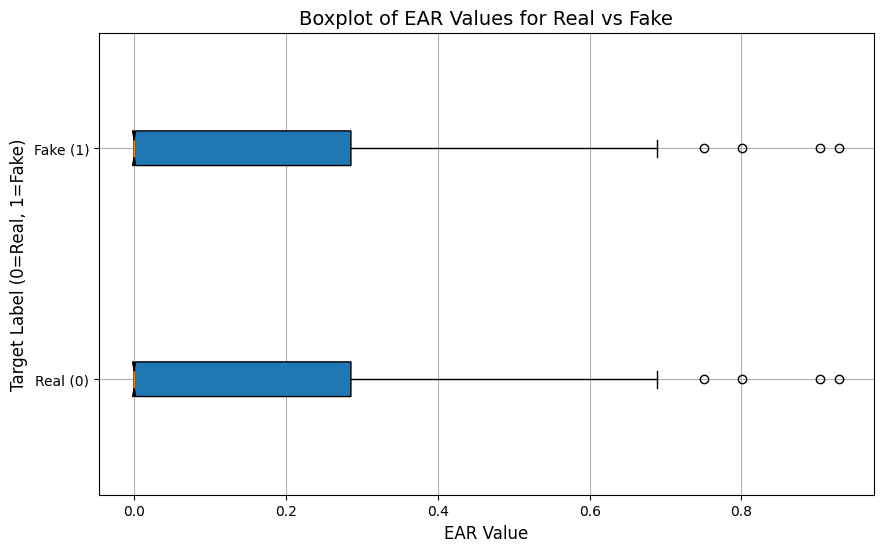

In [44]:
# Step 1: Extract EAR values from X_dataset (feature 0, index 0 of the 3rd axis)
EAR_values = X_dataset[:, :, 0].flatten()  # Flatten the EAR values to a 1D array

# Step 2: Flatten the target labels
target_labels = Y_dataset.flatten()  # Flatten the target labels to a 1D array

# Step 3: Create a boxplot for EAR values by target label
plt.figure(figsize=(10, 6))
plt.boxplot([EAR_values[target_labels == 0], EAR_values[target_labels == 1]],
            labels=['Real (0)', 'Fake (1)'], patch_artist=True, notch=True, vert=False)

# Title and labels
plt.title('Boxplot of EAR Values for Real vs Fake', fontsize=14)
plt.xlabel('EAR Value', fontsize=12)
plt.ylabel('Target Label (0=Real, 1=Fake)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

In [28]:
# Split train and test data

# Step 1: Train-test split by video
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42, shuffle=True)

In [32]:
# Step 2: Flatten train and test sets
X_train_flat = X_train.reshape(-1, 3)
Y_train_flat = Y_train.reshape(-1, 1)

X_test_flat = X_test.reshape(-1, 3)
Y_test_flat = Y_test.reshape(-1, 1)

In [33]:
# Train the ESN
esn = EchoStateNetwork(reservoir_size=100, input_dim=3)
esn.train(X_train_flat, Y_train_flat)

In [34]:
# Predict on test data
predictions = esn.predict(X_test_flat)

print("Predictions shape:", predictions.shape)

Predictions shape: (19648, 1)


In [35]:
# Convert predictions to binary (0 or 1) using a threshold
predictions_binary = (predictions > 0.5).astype(int)  # Threshold at 0.5

# Calculate accuracy
accuracy = accuracy_score(Y_test_flat, predictions_binary)
print("Accuracy:", accuracy)

Accuracy: 0.4656453583061889


In [36]:
# Calculate MSE
mse = mean_squared_error(Y_test_flat, predictions)
print("Mean Squared Error:", mse)

# Calculate R² score
r2 = r2_score(Y_test_flat, predictions)
print("R² Score:", r2)

Mean Squared Error: 0.3227303550098183
R² Score: -0.3114122362303726


In [39]:
predictions = esn.predict(X_test[1])

binary_predictions = (predictions > 0.5).astype(int)

# Step 4: Final Decision: Average predictions to decide "Real" or "Fake"
average_prediction = np.mean(binary_predictions)
if average_prediction > 0.5:
    print("The video is FAKE.")
else:
    print("The video is REAL.")

print("Frame-wise Predictions:", binary_predictions)

The video is FAKE.
Frame-wise Predictions: [[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [40]:
Y_test[1]

array([0, 0, 0, ..., 0, 0, 0])